In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('lecture_05_data.csv', sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
for col_name in df.columns:
    print('Column ',col_name, '. Nulls: ', pd.isna(df[col_name]).sum())

Column  fixed acidity . Nulls:  0
Column  volatile acidity . Nulls:  0
Column  citric acid . Nulls:  0
Column  residual sugar . Nulls:  0
Column  chlorides . Nulls:  0
Column  free sulfur dioxide . Nulls:  0
Column  total sulfur dioxide . Nulls:  0
Column  density . Nulls:  0
Column  pH . Nulls:  0
Column  sulphates . Nulls:  0
Column  alcohol . Nulls:  0
Column  quality . Nulls:  0


In [36]:
y = df['quality']
X = df.drop(labels='quality', axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

params = {'n_estimators': 1000,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'absolute_error'}

In [7]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.857631,0.279690,0.333803,6.394079,0.045600,35.143823,138.226519,0.994026,3.187443,0.490151,10.513089
std,0.843231,0.102635,0.120978,5.104871,0.021531,17.075929,42.643525,0.003003,0.150786,0.115190,1.227336
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987130,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991740,3.080000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,33.000000,134.000000,0.993730,3.180000,0.480000,10.400000
75%,7.300000,0.330000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996075,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [37]:
regressor_list = [LinearRegression(),
                  RandomForestRegressor(n_estimators=500),
                  GradientBoostingRegressor(**params)]

In [38]:
for reg in regressor_list:
    pipeline = Pipeline(steps=[('regressor', reg)])
    model_pipeline = pipeline.fit(X_train, y_train)
    preds = model_pipeline.predict(X_test)
    print('MSE: ', mean_squared_error(y_test, preds))
    print('R2: ', r2_score(y_test, preds))

MSE:  0.5736187345854395
R2:  0.28423981948786736
MSE:  0.36747448979591835
R2:  0.5414661493927314
MSE:  0.3876917902076476
R2:  0.5162390469295849


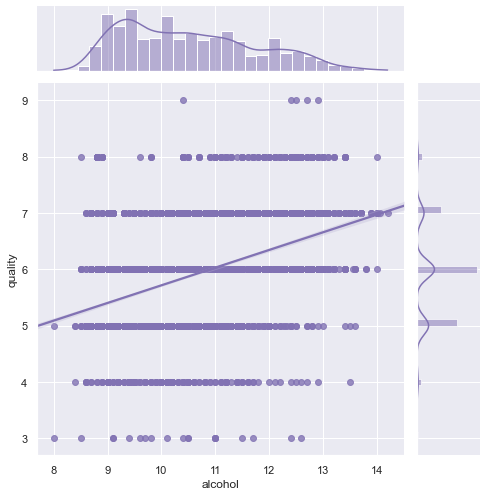

In [10]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="alcohol", y="quality", data=df,
                  kind="reg", truncate=False,
#                   xlim=(0, 15), ylim=(0, 10),
                  color="m", height=7)